# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**


* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины. Правила переноса дедлайнов определены в презентации с первого занятия.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Задачи 1 и 2 сдаются в систему Яндекс.Контест. Ссылка на контест в телеграм-боте.


**Сдача задачи 3:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 10 баллов
* Задача 2 &mdash; 10 баллов
* Задача 3 &mdash; 80 баллов


Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [76]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white', font_scale=1.3, palette='Set2')

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 2.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 3.

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

На дополнительном занятии 10 февраля будет показан простой пример работы с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных обучить несколько классификаторов для определения выживших, иначе говоря, получить некоторые приближенные правила определения, выжил пассажир или нет, а также сравнить эти правила по качеству приближения.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [78]:
data = pd.read_csv('train.csv', index_col=0)
data.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [79]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3)

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [80]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [81]:
train_features, train_target = get_features_and_target(train)
test_features, test_target = get_features_and_target(test)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков.*

Перед тем, как проводить исследование выдвеним несколько гипотез, по поводу зависимости успеха спасения от признаком. Далее проведен исследования согласно с нашими гипотезами, чтобы подтвердить или опровергнуть их.

1) Пол влияет на ключевой фактор: женщин спасали впервую очередь, мужщин во вторую

2) Класс пассажира тоже оказывает влияние: чем выше класс тем большее предпочтение персонал отдавал при занятии шлюпок

3) Возраст тоже влияет на шанс выжить: сначала спасали детей и стариков

4) Количество родственников не оказывало прямого эффекта на шанс выжить

5) Цена билета оказывает влияние, но только по той причине, что определяет класс пассажира

Разобьем тестовую выборку на части по двум признакам пол и выживаемость

In [82]:
survivors = train.loc[(train['Survived'] == 1)]
male = train.loc[train['Sex'] == 'male'];
female = train.loc[train['Sex'] == 'female'];
male_survivors = train.loc[((train['Sex'] == 'male') & (train['Survived'] == 1))]
female_survivors = train.loc[((train['Sex'] == 'female') & (train['Survived'] == 1))]

Вычислим размеры частей

In [83]:
count = train.count()
count_survivors = survivors.count()
count_male = male.count()
count_femalemale = female.count()
count_male_survivors = male_survivors.count()
count_femalemale_survivors = female_survivors.count()

# **2.1 Пол**

Проверим гипотезу 1, для этого построим 2 круговые диаграммы: соотношение выживших и умерших для мужщин и женщин.

In [84]:
# Функция, которая вычисляет проценты для кусков круговой диаграммы
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct)

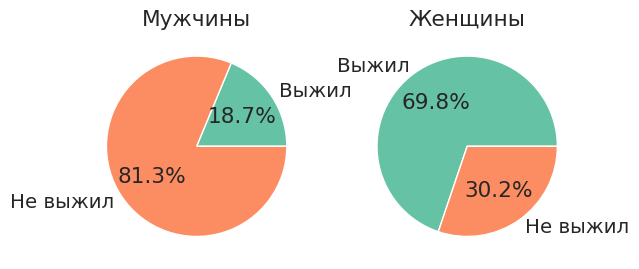

In [85]:
# код построения круговой диаграммы
# все круговые диаграммы были построены с помощью него
# с другими titles, label, sign и набором данных
fig = plt.figure()
titles = ['Мужчины', 'Женщины']
for i, data_diagram in enumerate([male, female]):
    sign = 'Survived'
    fig.add_subplot(1, 2, i + 1)
    data = [data_diagram[sign].loc[data_diagram[sign] == 1].size,
            data_diagram[sign].loc[data_diagram[sign] == 0].size]
    plt.pie(data, labels = ['Выжил', 'Не выжил'], autopct=lambda pct: func(pct, data))
    plt.title(titles[i])

Как видно из диаграммы наша гипотеза была верна и пол очень сильно влияет шанс выжить. Из преведенных выше диаграмм можно понять, что без учета других факторов, шанс выжить у мужчин = 17%, а у женщин 75%. Чтобы уточнить данные цифры необходимо провести исследования для других параметров, но можно скачать, что наша гипотеза была однозначно верна.


# **2.2 Возраст.**

Для этого построим следующие столбчатые диаграммы количества выживших от возраста для 2 наборов данных: мужчины, женщины.

Как видно из графика, выжили практически все женщины независимо от возраста. Можно предположить, что мужчины пропускали их впервую очередь. Так же видно, что процент выживших немного выше среди женщин пожилого возраста.

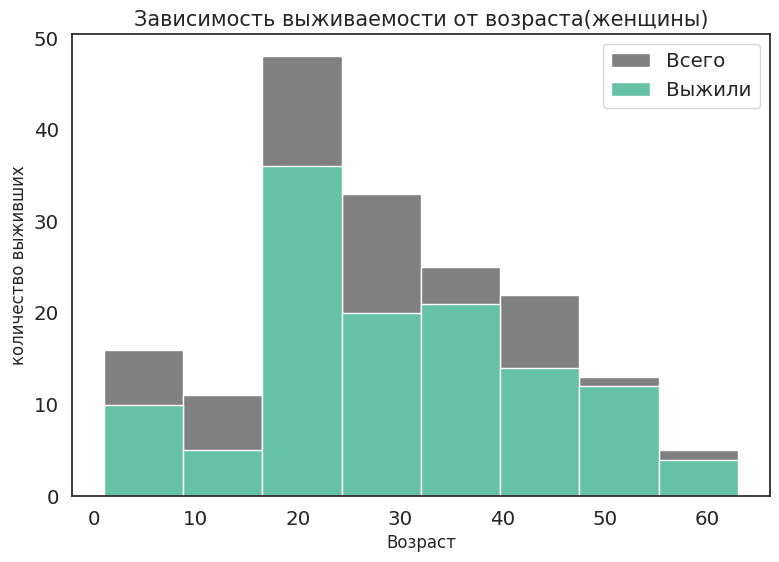

In [86]:
# код построения столбчатой диаграммы
# все столбчатые диаграммы были построены с помощью него
with sns.axes_style("white"):
    plt.figure(figsize=(9, 6))
    plt.ylabel(r'количество выживших', fontsize=12)
    plt.xlabel(r'Возраст', fontsize=12)
    plt.title(r'Зависимость выживаемости от возраста(женщины)', fontsize=15)
    plt.hist(female['Age'], density=False, bins=8, color='grey', label = 'Всего')
    plt.hist(female_survivors['Age'], density=False, bins=8, label = 'Выжили')
    plt.legend()

Из следующего графика видно, процент выживших мужщин почти всех возрастов очень мал. Можно предположить, что мужчины садились в шлюпки последними. Так же видно, что процент выживших намного выше среди детей, так как их спасали вместе с женщинами в первую очередь.

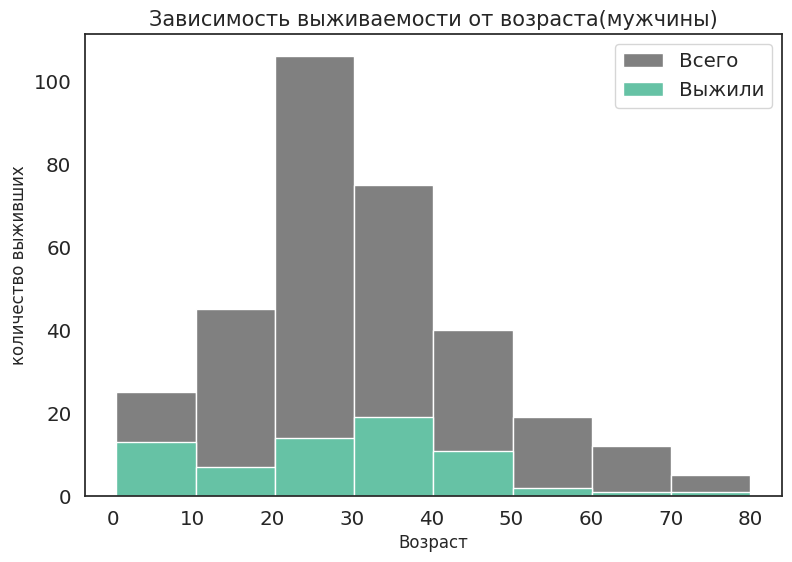

In [87]:
with sns.axes_style("white"):
    plt.figure(figsize=(9, 6))
    plt.ylabel(r'количество выживших', fontsize=12)
    plt.xlabel(r'Возраст', fontsize=12)
    plt.title(r'Зависимость выживаемости от возраста(мужчины)', fontsize=15)
    plt.hist(male['Age'], density=False, bins=8, color='grey', label = 'Всего')
    plt.hist(male_survivors['Age'], density=False, bins=8, label = 'Выжили')
    plt.legend()

Подытожим 2 диаграммы приведеные выше, большой разницы процента выживших от возраста не наблюдается, кроме того что этот процент заметно выше среди детей до 10 лет и немного выше среди женщин пожилого возраста.

Тогда более подробно рассмотрим процент выживаемости среди людей до 20 лет.
Мы можем увидеть, что тенденция повышенной выживаемости наблюдается до 14 лет и дальше снижается примерно до средней по всем возрастам.

In [88]:
train_young = train.loc[(train['Age'] <= 20)]
survivors_young = train_young.loc[train_young['Survived'] == 1]

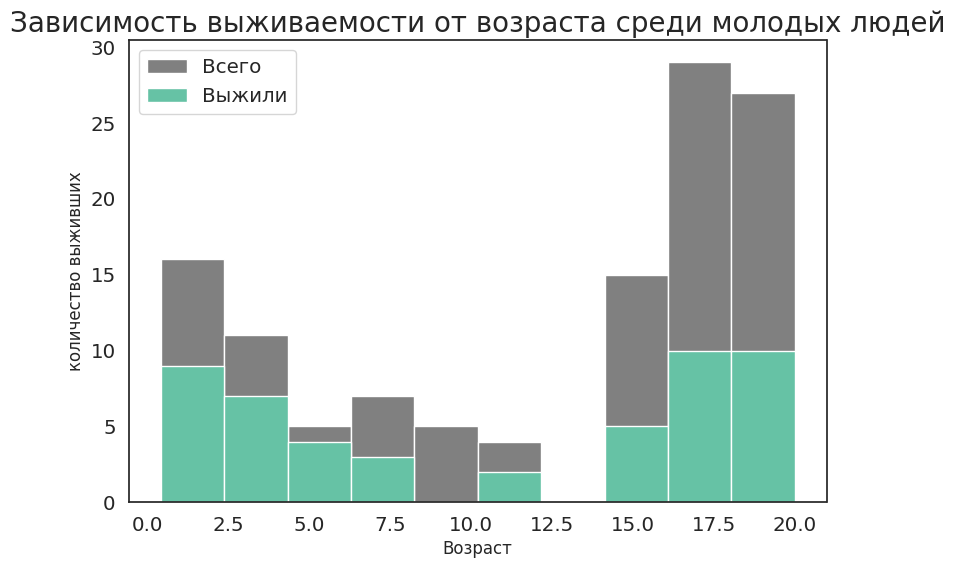

In [89]:
with sns.axes_style("white"):
    plt.figure(figsize=(9, 6))
    plt.ylabel(r'количество выживших', fontsize=12)
    plt.xlabel(r'Возраст', fontsize=12)
    plt.title(r'Зависимость выживаемости от возраста среди молодых людей', fontsize=20)
    plt.hist(train_young['Age'], density=False, bins=10, color='grey', label = 'Всего')
    plt.hist(survivors_young['Age'], density=False, bins=10, label = 'Выжили')
    plt.legend()

Так мы расмотрели два основных признака пол и возраст. И поняли, что они заметно влияют на результат

# **2.3 Класс пассажира**

Далее рассмотрим вероятность выживаемости в зависимости от класса пассажира, так как можно предположить, что этот параметр достаточно сильно влияет на успех спасения

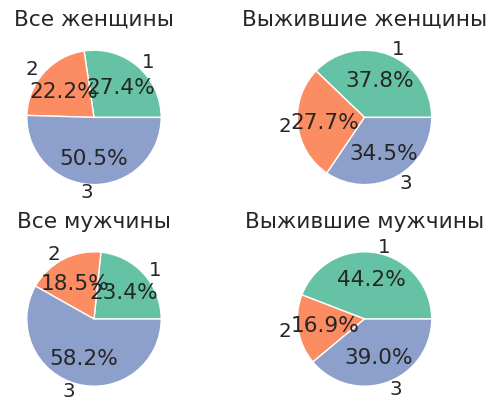

In [90]:
fig = plt.figure()
titles = ['Все женщины', 'Выжившие женщины', 'Все мужчины', 'Выжившие мужчины']
for i, data_diagram in enumerate([female, female_survivors, male, male_survivors]):
    sign = 'Pclass'
    fig.add_subplot(2, 2, i + 1)
    data = [data_diagram[sign].loc[data_diagram[sign] == 1].size,
            data_diagram[sign].loc[data_diagram[sign] == 2].size,
            data_diagram[sign].loc[data_diagram[sign] == 3].size]
    plt.pie(data, labels = ['1', '2', '3'], autopct=lambda pct: func(pct, data))
    plt.title(titles[i])

Как мы и предполагали класс пассажира заметно влияет на шанс выжить, в особенности среди мужчин, разница среди женщин намного меньше, значит их спасали вперую очередь практически независимо от класса. Можно предположить, что экипаж впервую очередь эвакуировали богатых пассажиров.

# **2.4 Город отправления**

Следующим параметром рассмотрим зависимоть выживаемости от порта отправления.

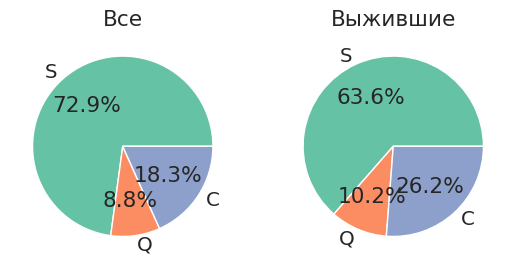

In [91]:
fig = plt.figure()
titles = ['Все', 'Выжившие']
for i, data_diagram in enumerate([train, survivors]):
    sign = 'Embarked'
    fig.add_subplot(1, 2, i + 1)
    data = [data_diagram[sign].loc[data_diagram[sign] == 'S'].size,
            data_diagram[sign].loc[data_diagram[sign] == 'Q'].size,
            data_diagram[sign].loc[data_diagram[sign] == 'C'].size]
    plt.pie(data, labels = ['S', 'Q', 'C'], autopct=lambda pct: func(pct, data))
    plt.title(titles[i])

Как мы видим, наша гипотеза на это счет была верна и город отправления не влияет на ключевой признак и далее его не стоит учитывать.

# **2.5 Цена билета**

Посмотрим зависимоть от цены билета

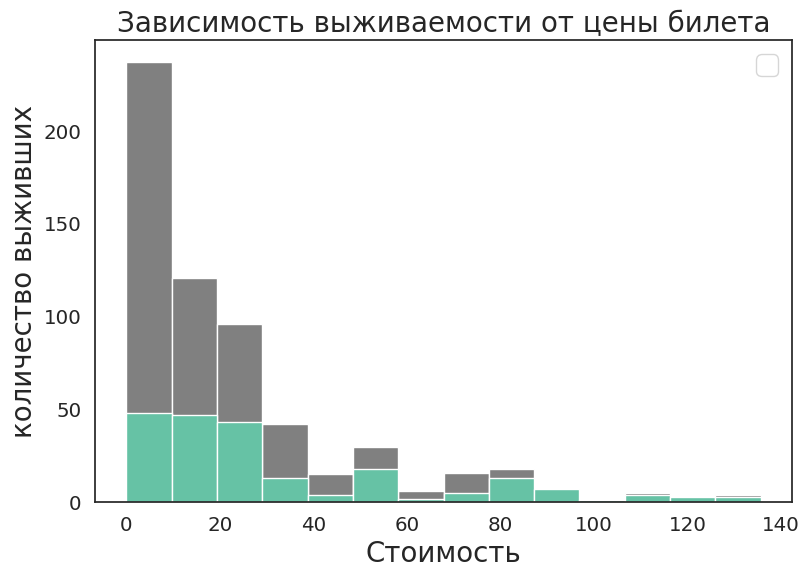

In [92]:
with sns.axes_style("white"):
    plt.figure(figsize=(9, 6))
    plt.ylabel(r'количество выживших', fontsize=20)
    plt.xlabel(r'Стоимость', fontsize=20)
    plt.title(r'Зависимость выживаемости от цены билета', fontsize=20)
    plt.legend(r'Выжившие', fontsize=20)
    plt.hist(train['Fare'].loc[train['Fare'] <= 140], density=False, bins=14, color='grey')
    plt.hist(survivors['Fare'].loc[survivors['Fare'] <= 140], density=False, bins=14)

Из графика видно, что при стоимости билета больше 50 вероятность выживания заметно повышается, однако очевидно, что класс пассажира и стоимость билета очень сильно зависимы, поэтому учитывать их одновременно нельзя.


# **2.6 Число родственников**

Дале рассмотрим последний параметр число родственников на титанике.


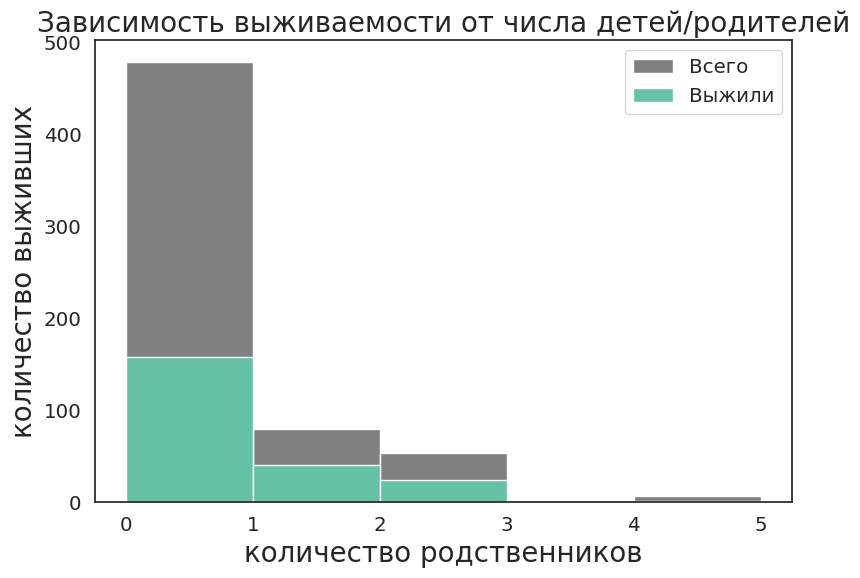

In [109]:
with sns.axes_style("white"):
    plt.figure(figsize=(9, 6))
    plt.ylabel(r'количество выживших', fontsize=20)
    plt.xlabel(r'количество родственников', fontsize=20)
    plt.title(r'Зависимость выживаемости от числа детей/родителей', fontsize=20)
    plt.legend(r'Выжившие', fontsize=20)
    plt.hist(train['Parch'].loc[train['Parch'] <= 5], density=False, bins=5, color='grey', label = 'Всего')
    plt.hist(survivors['Parch'].loc[survivors['Parch'] <= 5], density=False, bins=max(survivors['Parch'].loc[survivors['Parch'] <= 5]), label = 'Выжили')
    plt.legend()

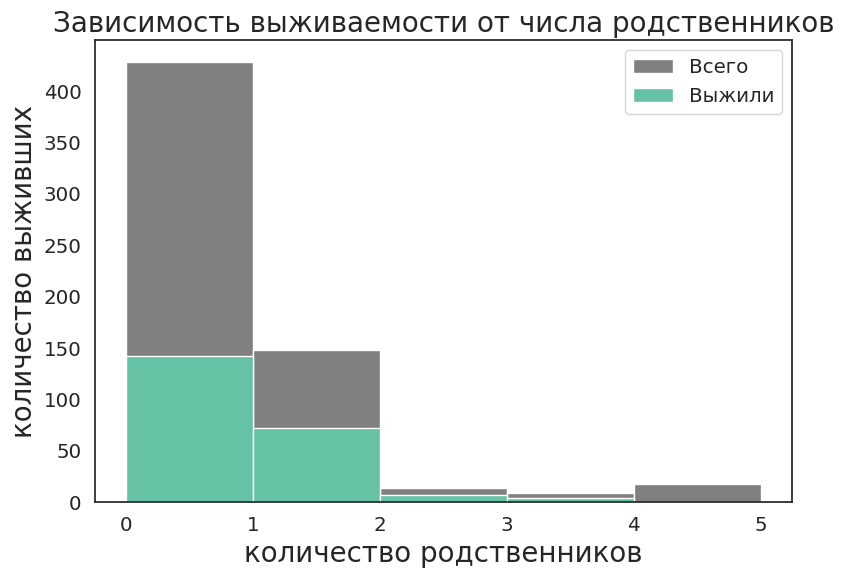

In [110]:
with sns.axes_style("white"):
    plt.figure(figsize=(9, 6))
    plt.ylabel(r'количество выживших', fontsize=20)
    plt.xlabel(r'количество родственников', fontsize=20)
    plt.title(r'Зависимость выживаемости от числа родственников', fontsize=20)
    plt.legend(r'Выжившие', fontsize=20)
    plt.hist(train['SibSp'].loc[train['SibSp'] <= 5], density=False, bins=5, color='grey', label = 'Всего')
    plt.hist(survivors['SibSp'].loc[survivors['SibSp'] <= 5], density=False, bins=max(survivors['SibSp'].loc[survivors['SibSp'] <= 5]), label = 'Выжили')
    plt.legend()

Как мы видим эти два параметра неожиданно и вопреки нашей гипотезе, дают определенные результаты по определению вероятности выживания, можно сказать, что люди с 1 или 2 в графе 'parch' и c 1 в графе 'sibsp' выживали чаще чем люди с 0 в этих параметрах. Но в случае если мы решим использовать отбор по данным параметрам делать это надо осторожно, так как причины такой зависимости весьма неочевидны и могут быть линейно зависимы с уже выявленными параметрами. При использовании их необхоимы дополнительные общирные иследования

# **2.7 Итог**

Подводя итоги пункта 2 можно выделить 3 основных параметра от которых зависит шанс на спасение:

1) Класс пассажира

2) Пол пассажира

3) Возраст (только проверка, >14 лет или нет)

Так же мы получили подтверждение нашим гипотезам 1, 2, 3, 5 и опровергли гипотезу номер 4.

# **3. Классификация методом ближайшего соседа**

Ранее в контесте вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи.

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [ ]:
# матричное умножение
def matrix_multiplication(A: np.ndarray, B: np.ndarray) -> np.ndarray:
  out = A[:, None, :] * B.T[None, :, :]
  return (out.sum(axis = 2))

In [ ]:
# поиск ближайших k соседей
def find_nearest_points(A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:
  B_sqr = ((B * B).sum(axis= 1))[:, None]
  A_sqr = (((A * A).sum(axis= 1))[:, None]).T
  AB = matrix_multiplication(B, A.T)
  return np.argsort(A_sqr - 2 * AB + B_sqr)[:, :k]

In [95]:
# вычисляем каких соседей больше
def knn(features, train_features, train_target, k=1):
    nearest_k = find_nearest_points(train_features, features, k)
    pred = [np.bincount(i).argmax() for i in train_target[nearest_k]]
    return pred

Постройте классификатор методом ближайшего соседа, используя только признаки `Age` и `Fare`.

Какую метрику (функцию расстояния) вы при этом используете? Нужно ли предварительно что-то сделать с признаками?

# 3.1 Маштабирование признаков

Предварительно необходимо отнормировать значения Age и Fare, чтобы они учитывались равнозначно. В качестве нормировки будем использовать формулу `(х - x.min)/(x.max - x.min)` и возьмем обычную евклидомв метрику.

In [96]:
test_features['Age_norm'] = test_features['Age'].apply(lambda x: (x - min(test_features['Age'])) / (max(test_features['Age']) - min(test_features['Age'])))
test_features['Fare_norm'] = test_features['Fare'].apply(lambda x: (x - min(test_features['Fare'])) / (max(test_features['Fare']) - min(test_features['Fare'])))

train_features['Age_norm'] = train_features['Age'].apply(lambda x: (x - min(train_features['Age'])) / (max(train_features['Age']) - min(train_features['Age'])))
train_features['Fare_norm'] = train_features['Fare'].apply(lambda x: (x - min(train_features['Fare'])) / (max(train_features['Fare']) - min(train_features['Fare'])))

<ipython-input-96-88ca49fb95ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features['Age_norm'] = test_features['Age'].apply(lambda x: (x - min(test_features['Age'])) / (max(test_features['Age']) - min(test_features['Age'])))
<ipython-input-96-88ca49fb95ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features['Fare_norm'] = test_features['Fare'].apply(lambda x: (x - min(test_features['Fare'])) / (max(test_features['Fare']) - min(test_features['Fare'])))
<ipython-input-96-88ca49fb95ba>:4

Как меняется результат классификации при другом количестве соседей? Рассмотрите хотя бы три различных нечетных значения количества соседей.

Так как функции оценки качества у нас пока нет, просто сравним общее количество выживших при различных значениях параметра k

In [97]:
print(1, ' ', sum(knn(test_features[['Age', 'Fare']].to_numpy(), train_features[['Age', 'Fare']].to_numpy(), train_target.to_numpy(), 1)))
print(3, ' ', sum(knn(test_features[['Age', 'Fare']].to_numpy(), train_features[['Age', 'Fare']].to_numpy(), train_target.to_numpy(), 3)))
print(5, ' ', sum(knn(test_features[['Age', 'Fare']].to_numpy(), train_features[['Age', 'Fare']].to_numpy(), train_target.to_numpy(), 5)))

1   85
3   83
5   78


Как можно было бы учесть другие признаки? Какие при этом могут возникнуть проблемы?

 Можно учесть такой параметр, как класс пассажира, при этом сложность состоит в том, что данный признак бинарный, у пассажиров класс либо совпадает, либо нет

...

Строить классификатор с другими признаками при этом не нужно.

#### 4. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.
Реализуйте полученные деревья по шаблону

Как мы увидели основные факторы это пол, класс и возраст. Их и будем учитывать при построении разделяющих деревьев

**Дерево 1:** Сначала посмотрим на основании возраста и пола

In [98]:
def tree1(age, sex):
  if sex == 'female':
    return 1
  else:
    if age <= 6:
      return 1
    else:
      return 0

**Дерево 2:** Построим его на основании пола и класса, согласно иследованию это два саммых важных пункта

In [99]:
def tree2(sex, pclass):
  if sex == 'male':
    if pclass == 1:
      return 1
    else:
      return 0
  else:
    return 1

#### 5. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:** количество правильных ответов / общее количество ответов

...

Реализуйте данный критерий по шаблону

In [100]:
'''
Вычисление критерия качества для предсказания predicted,
если истинные значения -- target.
Возвращает одно вещественное число.
'''
def criteria(target, predicted):
    return 1 - sum(abs(target - predicted))/len(target)

Оцените качество построенных ранее моделей (два дерева, kNN), используя предложенный критерий.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

Посчитаем точность работы различных методов и сведем их в одну таблицу

In [108]:
d = {
    "tree_1": criteria(test_target ,test_features.apply(lambda x: tree1(x.Age, x.Sex), axis = 1)),
    "tree_2": criteria(test_target ,test_features.apply(lambda x: tree2(x.Sex, x.Pclass), axis = 1)),
    "knn": criteria(test_target.to_numpy(), knn(test_features[['Age_norm', 'Fare_norm']].to_numpy(), train_features[['Age_norm', 'Fare_norm']].to_numpy(), train_target.to_numpy(), 11)),
}

pd.DataFrame(d, index=['criteria'])

,tree_1,tree_2,knn
criteria,0.828358,0.802239,0.66791


Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

Проанализируем зависимость точности определения от k(количество соседей)

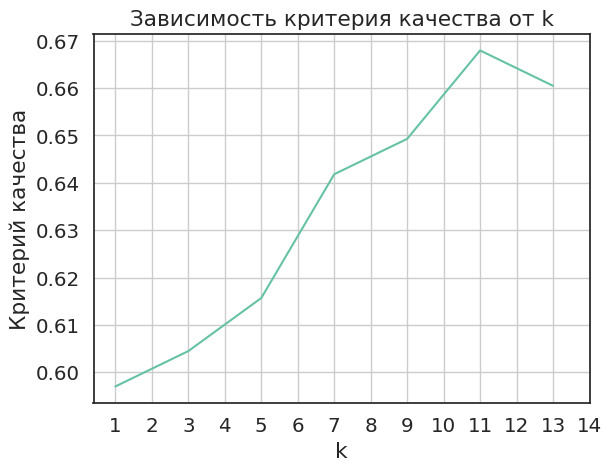

In [107]:
#вычисление точности для различных k
y = []
x = []
for i in range(1, 15, 2) :
  y.append(criteria(test_target.to_numpy(), knn(test_features[['Age_norm', 'Fare_norm']].to_numpy(), train_features[['Age_norm', 'Fare_norm']].to_numpy(), train_target.to_numpy(), i)))
  x.append(i)
#построение графика y от x
plt.plot(x, y)
plt.xlabel('k')
plt.ylabel('Критерий качества')
plt.title('Зависимость критерия качества от k')
plt.xticks(range(1, 15))
plt.grid(True)
plt.show()


Из данного графика видно, что:

1) При маленьких k точность не так высока, это можно обосновать тем, что при малом количестве соседей, данный метод не отделяет выбросы от основной доли точек, тем самым понижая точность.

2) С увеличением k точность возрастает.

#### 6. Выводы

В работе мы провели исследования зависимости шанса на выживание в зависимости от различных признаков, большая часть наших гипотез подтвердилась:

1) Главные признаки пол, возраст и класс

2) остальные не влияют совсем или влияют слабо

Так же мы используя два различных метода: kNN и разделяющее дерево, научились с достаточно большой точностью предсказывать выжил человек или нет. Точность алгоритмов приведена в таблице:

tree_1	= 83%

tree_2	= 80%

knn = 67%

Как мы увидели разделяющее дерево дает значительно большую точность чем kNN и хорошо делит людей на две группы по целеврму признаку, для повышения точности работы kNN следует подоборать подходящую функцию весов.

Так же следует отметить, что разделляющее дерево показало хорошие результаты даже имея глубину 2.

Knn давала неточные результаты при малых малых k (в нашем случае k <= 6) метод неточен, так как чуствителен к шумам

лучшие результаты наблюдались при
k = 11, 13